In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os.path 
import math 

from modules import calcs_all as calcs
from modules import conversions as convs


In [4]:
# Column 1-3:   right hand average orientation (phi1, PHI, phi2 in radians)
# Column 4-6:   left hand average orientation (phi1, PHI, phi2 in radians)
# Column 7:     Misorientation Angle
# Column 8-10:  Misorientation Axis in Right Hand grain
# Column 11-13: Misorientation Axis in Left Hand grain
# Column 14:    length (in microns)
# Column 15:    trace angle (in degrees)
# Column 16-19: x,y coordinates of endpoints (in microns)
# Column 20-21: IDs of right hand and left hand grains

name='1_001'
lattice='fcc'
pa_current = os.getcwd()
pa_txt = pa_current + '/pyinputs/' + name + '.txt'
pa_parent = os.path.dirname(pa_current)
gbdata = np.genfromtxt(pa_txt)

dim=1
proc=5
k=0

In [81]:
calcs.calcs_all(name, lattice, gbdata, pa_parent, dim, proc, k)

Calculating energy values
1_001 Boundary 0 / 3934
1_001 Boundary 1 / 3934
1_001 Boundary 2 / 3934
1_001 Boundary 3 / 3934
1_001 Boundary 4 / 3934
1_001 Boundary 5 / 3934
1_001 Boundary 6 / 3934
1_001 Boundary 7 / 3934
1_001 Boundary 8 / 3934
1_001 Boundary 9 / 3934
1_001 Boundary 10 / 3934
1_001 Boundary 11 / 3934
1_001 Boundary 12 / 3934
1_001 Boundary 13 / 3934
1_001 Boundary 14 / 3934
1_001 Boundary 15 / 3934
1_001 Boundary 16 / 3934
1_001 Boundary 17 / 3934
1_001 Boundary 18 / 3934
1_001 Boundary 19 / 3934
1_001 Boundary 20 / 3934
1_001 Boundary 21 / 3934
1_001 Boundary 22 / 3934
1_001 Boundary 23 / 3934
1_001 Boundary 24 / 3934
1_001 Boundary 25 / 3934
1_001 Boundary 26 / 3934
1_001 Boundary 27 / 3934
1_001 Boundary 28 / 3934
1_001 Boundary 29 / 3934
1_001 Boundary 30 / 3934
1_001 Boundary 31 / 3934
1_001 Boundary 32 / 3934
1_001 Boundary 33 / 3934
1_001 Boundary 34 / 3934
1_001 Boundary 35 / 3934
1_001 Boundary 36 / 3934
1_001 Boundary 37 / 3934
1_001 Boundary 38 / 3934
1_001 Bou

In [5]:
def rot2eul(R):
    beta = -np.arcsin(R[2,0])
    alpha = np.arctan2(R[2,1]/np.cos(beta),R[2,2]/np.cos(beta))
    gamma = np.arctan2(R[1,0]/np.cos(beta),R[0,0]/np.cos(beta))
    return np.array((alpha, beta, gamma))

def eul2rot(theta):
    R = np.array([[np.cos(theta[1])*np.cos(theta[2]),       np.sin(theta[0])*np.sin(theta[1])*np.cos(theta[2]) - np.sin(theta[2])*np.cos(theta[0]),      np.sin(theta[1])*np.cos(theta[0])*np.cos(theta[2]) + np.sin(theta[0])*np.sin(theta[2])],
                  [np.sin(theta[2])*np.cos(theta[1]),       np.sin(theta[0])*np.sin(theta[1])*np.sin(theta[2]) + np.cos(theta[0])*np.cos(theta[2]),      np.sin(theta[1])*np.sin(theta[2])*np.cos(theta[0]) - np.sin(theta[0])*np.cos(theta[2])],
                  [-np.sin(theta[1]),                        np.sin(theta[0])*np.cos(theta[1]),                                                           np.cos(theta[0])*np.cos(theta[1])]])

    return R

def eul2orient(theta): #Radians
    g = np.array([[np.cos(theta[0])*np.cos(theta[2])-np.sin(theta[0])*np.sin(theta[2])*np.cos(theta[1]), np.sin(theta[0])*np.cos(theta[2])+np.cos(theta[0])*np.sin(theta[2])*np.cos(theta[1]), np.sin(theta[2])*np.sin(theta[1])],
                  [(-1)*np.cos(theta[0])*np.sin(theta[2])-np.sin(theta[0])*np.cos(theta[2])*np.cos(theta[1]), (-1)*np.sin(theta[0])*np.sin(theta[2])+np.cos(theta[0])*np.cos(theta[2])*np.cos(theta[1]), np.cos(theta[2])*np.sin(theta[1])],
                  [np.sin(theta[0])*np.cos(theta[1]), -np.cos(theta[0])*np.sin(theta[1]), np.cos(theta[1])]])

    return g

def orientation_matrix(euler1,euler2): #Radians
    g_1=eul2orient(euler1)
    g_2=eul2orient(euler2)
    orientation_matrix=np.dot(g_1,np.linalg.inv(g_2))
    return orientation_matrix

def misorientation_angle(orientation_matrix):
    cos_mori=(orientation_matrix[0][0]+orientation_matrix[1][1]+orientation_matrix[2][2]-1)/2 #Degrees
    misorientation_angle=np.arccos(cos_mori)
    misorientation_angle=np.degrees(misorientation_angle)   
    return misorientation_angle

def misorientation_angle_2(R1): # From Sabines Code
    misang1 = np.arccos(0.5*(R1[0,0]+R1[1,1]+R1[2,2]-1))
    
    p1 = (R1[2,1]-R1[1,2])/(2*np.sin(misang1))
    p2 = (R1[0,2]-R1[2,0])/(2*np.sin(misang1))
    p3 = (R1[1,0]-R1[0,1])/(2*np.sin(misang1))

    ax = [p1,p2,p3]
    ang = misang1
    ax = ax/np.linalg.norm(ax)
    ang=np.degrees(ang)
    return ang, ax

def eu2qu(Eul):
    
    P = -1
    
    o = (Eul[0]+Eul[2])/2 
    d = (Eul[0]-Eul[2])/2
    c = np.cos(Eul[1]/2)
    s = np.sin(Eul[1]/2)
    q = [c*np.cos(o), -P*s*np.cos(d), -P*s*np.sin(d), -P*c*np.sin(o)]

    if c*np.cos(o) <0:
        q = [-c*np.cos(o), P*s*np.cos(d), P*s*np.sin(d), P*c*np.sin(o)]

    else:
        q = [c*np.cos(o), -P*s*np.cos(d), -P*s*np.sin(d), -P*c*np.sin(o)]
    return q 

def ax2qu(ax, ang):
    q = [np.cos(ang/2), np.sin(ang/2)*ax[0], np.sin(ang/2)*ax[1], np.sin(ang/2)*ax[2]]
    
    return q

In [5]:
copper = np.array([90, 35, 45])
s3 = np.array([59, 37, 63])

#copper=np.array([40, 65, 26])
#s3=np.array([59, 37, 63])
#brass=np.array([35,45,0])

# Degrees to Rad
copper=np.deg2rad(copper)
s3=np.deg2rad(s3)

In [6]:
import transforms3d.euler as eul

ang = eul.mat2euler(R, axes='sxyz')
eul.euler2mat(ang[0], ang[1], ang[2], axes='sxyz')

ModuleNotFoundError: No module named 'transforms3d'

In [36]:
eu2qu(s3)

[0.45975643115113585,
 0.31711136298169507,
 -0.011073772809897697,
 0.8294225575898073]

In [8]:
g_copper=eul2orient(copper)
g_s3=eul2orient(s3)
print(g_copper)
print()
print(g_s3)
print('-----')
print(convs.eultomat(copper))
print()
print(convs.eultomat(s3))

[[-5.79227965e-01  7.07106781e-01  4.05579788e-01]
 [-5.79227965e-01 -7.07106781e-01  4.05579788e-01]
 [ 8.19152044e-01 -3.51214273e-17  8.19152044e-01]]

[[-0.37612881  0.75564147  0.53622111]
 [-0.76968795 -0.57700279  0.2732183 ]
 [ 0.68456424 -0.30995765  0.79863551]]
-----
[[-5.79227965e-01  7.07106781e-01  4.05579788e-01]
 [-5.79227965e-01 -7.07106781e-01  4.05579788e-01]
 [ 5.73576436e-01 -3.51214273e-17  8.19152044e-01]]

[[-0.37612881  0.75564147  0.53622111]
 [-0.76968795 -0.57700279  0.2732183 ]
 [ 0.51585616 -0.30995765  0.79863551]]


In [9]:
m_mori=orientation_matrix(copper,s3)
print(m_mori)
m_mori_test = np.array([[0.970, 0.149, -0.194],
            [-0.099, 0.965, 0.244],
            [0.224,-0.218, 0.950]])

[[ 0.95833555  0.12545219 -0.17852424]
 [-0.08471414  0.99382063  0.22472744]
 [ 0.19399694 -0.27805724  0.99056091]]


In [10]:
cos_mori=(m_mori[0][0]+m_mori[1][1]+m_mori[2][2]-1)/2 #Degrees
angle=np.arccos(cos_mori)
print(np.degrees(angle))

13.746027957824028


In [11]:
cos_mori_test=(m_mori_test[0][0]+m_mori_test[1][1]+m_mori_test[2][2]-1)/2 #Degrees
angle_test=np.arccos(cos_mori_test)
print(np.degrees(angle_test))
print(misorientation_angle(m_mori_test))

19.52427151028469


TypeError: misorientation_angle() missing 1 required positional argument: 'symm'

In [13]:
r1=(m_mori[1][2]-m_mori[2][1])/(2*np.sin(angle))
r2=(m_mori[2][0]-m_mori[0][2])/(2*np.sin(angle))
r3=(m_mori[0][1]-m_mori[1][0])/(2*np.sin(angle))
print(r1,r2,r3)

1.0579659387388956 0.7838638381446972 0.44223466648293974


In [14]:
r1_test=(m_mori_test[1][2]-m_mori_test[2][1])/(2*np.sin(np.radians(19.5)))
r2_test=(m_mori_test[2][0]-m_mori_test[0][2])/(2*np.sin(np.radians(19.5)))
r3_test=(m_mori_test[0][1]-m_mori_test[1][0])/(2*np.sin(np.radians(19.5)))
print(r1_test,r2_test,r3_test)

0.6920169361715439 0.6261105612980636 0.37147229474143484


In [13]:
eul1 = gbdata[:,(0,1,2)]
eul2 = gbdata[:,(3,4,5)]

mis_angle = gbdata[:,6]

misor=[]
misor_2=[]

for i,euler in enumerate(eul1):
    m_orientation=orientation_matrix(eul1[i],eul2[i])
    misor_angle=misorientation_angle(m_orientation)
    misor.append(misor_angle)


#for i,euler in enumerate(eul1):
    #m_orientation=orientation_matrix(eul1[i],eul2[i])
    #misorientation_angle(m_orientation)
    #misor_angle=misorientation_angle(m_orientation)
    #if misor_angle >= 60:
        #m_orientation=orientation_matrix(eul2[i],eul1[i])
        #misor_angle=misorientation_angle(m_orientation)
    #misor_2.append(misorientation_angle_2(m_orientation))



<ipython-input-5-9d8f2965eed9>:29: RuntimeWarning: invalid value encountered in arccos
  misorientation_angle=np.arccos(cos_mori)


In [46]:
print(np.dot(np.array([eul1[1]]).T,np.array([eul1[1]])))
print(eul2[2])
def_grad=orientation_matrix(eul1[1],eul2[1])
print(eul2[1]*def_grad)

[[3.2400000e-02 4.5000000e-02 1.1122200e+00]
 [4.5000000e-02 6.2500000e-02 1.5447500e+00]
 [1.1122200e+00 1.5447500e+00 3.8180041e+01]]
[6.066 0.356 0.319]
[[ 5.91553884 -0.01667953 -0.0397574 ]
 [ 0.15439109  0.35468512 -0.02941954]
 [ 2.30154965  0.02091027  0.30902919]]


In [5]:
type(misor)

list

In [11]:
mis_angle_60=mis_angle
misor_60=misor
error=[]

for i ,angle in enumerate(misor):
    if angle>=60:
        np.delete(mis_angle_60, i)
        np.delete(misor_60, i)
    else:
        er=(abs(mis_angle[i]-angle)/mis_angle[i])*100
        error.append(er)

In [7]:
error[18]
(abs(mis_angle[27]-misor[27])/mis_angle[27])*100

82.12315802250434

In [97]:
misor[27]

77.73016384400485

In [78]:
np.average(error)

nan

In [70]:
print(len(mis_angle_60))
print(len(misor))

3934
3934


In [47]:
testing1=orientation_matrix(eul1[9],eul2[9])

ang_test,ax_test=misorientation_angle_2(testing1)

q = [np.cos(ang_test/2), np.sin(ang_test/2)*ax_test[0], np.sin(ang_test/2)*ax_test[1], np.sin(ang_test/2)*ax_test[2]]

print(q)

[0.9937369322789575, 0.06015563535556985, 0.07012108090920184, -0.0628589132255674]


<ipython-input-19-ccdeea57823b>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axes = plt.axes()


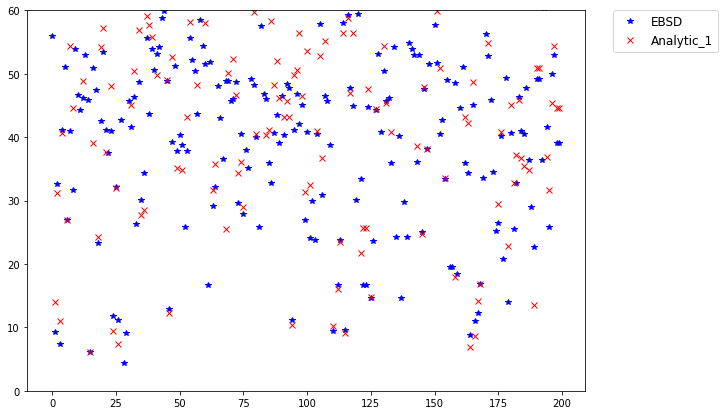

In [19]:
plt.figure(figsize=(10,7))
plt.plot(mis_angle[:200],'b*',label='EBSD')
plt.plot(misor[:200],'rx',label='Analytic_1')
axes = plt.axes()
axes.set_ylim([0, 60])
plt.legend(bbox_to_anchor=(1.05, 1), prop={'size': 12}, loc='upper left', borderaxespad=0.)
#plt.savefig('Misorientation.png' , bbox_inches='tight')

In [23]:
# Error Value, less than 60 degrees
error=[]

for i ,angle in enumerate(misor):
    if angle<60:
        er=(abs(mis_angle[i]-angle)/mis_angle[i])*100
        error.append(er)
print(np.average(error))

18.686525853721275


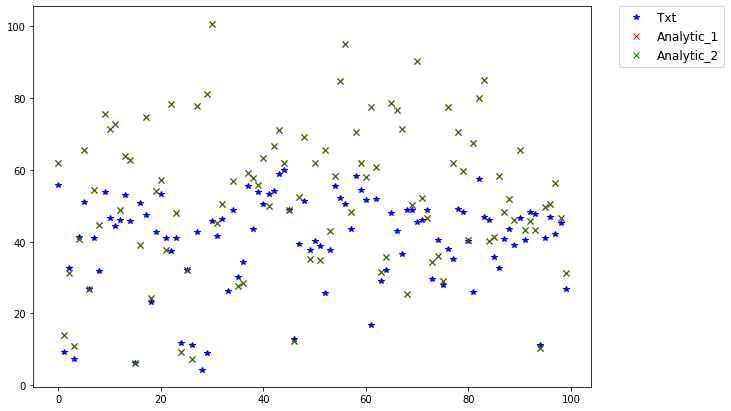

In [24]:
plt.figure(figsize=(10,7))
plt.plot(mis_angle[:100],'b*',label='Txt')
plt.plot(misor[:100],'rx',label='Analytic_1')
plt.plot(misor_2[:100],'gx',label='Analytic_2')
plt.legend(bbox_to_anchor=(1.05, 1), prop={'size': 12}, loc='upper left', borderaxespad=0.)

In [39]:
testing=9
print(mis_angle[testing], '--- TXT/Blue')
print(misor[testing], '--- Analytic_1/Red')
print(misor_2[testing], '--- TAnalytic_2/Green')

53.92 --- TXT/Blue
75.6221811166014 --- Analytic_1/Red
75.6221811166014 --- TAnalytic_2/Green


In [16]:
mis_angle[:100]

array([55.9 ,  9.33, 32.61,  7.38, 41.18, 51.04, 26.93, 41.  , 31.72,
       53.92, 46.61, 44.28, 46.11, 52.89, 45.8 ,  6.1 , 50.88, 47.41,
       23.23, 42.59, 53.38, 41.17, 37.45, 40.9 , 11.74, 32.07, 11.13,
       42.68,  4.39,  9.07, 45.71, 41.58, 46.38, 26.25, 48.75, 30.07,
       34.37, 55.63, 43.58, 53.83, 50.62, 53.16, 54.26, 58.78, 59.96,
       48.88, 12.9 , 39.27, 51.25, 37.79, 40.26, 38.83, 25.76, 37.8 ,
       55.66, 52.19, 50.46, 43.59, 58.42, 54.43, 51.56, 16.67, 51.87,
       29.17, 32.15, 48.09, 43.03, 36.49, 48.87, 48.89, 45.62, 45.96,
       48.77, 29.58, 40.45, 27.93, 37.92, 35.13, 49.2 , 48.28, 40.06,
       25.9 , 57.58, 46.79, 45.98, 35.85, 32.77, 40.71, 43.47, 39.11,
       46.54, 40.38, 48.39, 47.76, 11.15, 41.13, 46.8 , 42.13, 45.14,
       26.93])

In [84]:
misor[:100]

[61.97828057900842,
 14.04084250884038,
 31.212203964369095,
 11.038311436556958,
 40.70577559050904,
 65.56454085659088,
 26.953437568602748,
 54.40045555070186,
 44.52391639462215,
 75.6221811166014,
 71.456175406336,
 72.70543802144061,
 48.7714778788274,
 64.01019573895762,
 62.906441481810106,
 6.181870986079641,
 39.09254944673001,
 74.73816374877833,
 24.256816013231855,
 54.16365861008602,
 57.278231505388476,
 37.57606449728356,
 78.42499047983938,
 48.09425047817709,
 9.36909845327282,
 32.01731445857226,
 7.358826629034455,
 77.73016384400485,
 nan,
 81.12817999044253,
 100.78548046854552,
 45.1228488138415,
 50.49034780619011,
 nan,
 56.87635333505361,
 27.727143490384,
 28.58371205037513,
 59.04245782486561,
 57.735555758058965,
 55.71141466014473,
 63.28132768790687,
 49.83811963825979,
 66.75367276518826,
 71.04580186808087,
 61.91075248745343,
 48.951283061259446,
 12.241623206333088,
 52.57020432096432,
 69.11719017822014,
 35.11979383195856,
 61.99892679483871,
 34.81

In [95]:
a0 =[]
a5 =[]
a10 =[]
a15 =[]
a20 =[]
a25 =[]
a30 =[]
a35 =[]
a40 =[]
a45 =[]
a50 =[]
a55 =[]
a60 =[]
a65 =[]
a70 =[]
a75 =[]
a80 =[]
a85 =[]
a90 =[]

def angle_stat(angles):

    for tuple in zip(angles):
        if tuple[0] < 5:
            a0.append(tuple[1])
        elif tuple[0] >= 5 and tuple[0] < 10:
            a5.append(tuple[1])	
        elif tuple[0] >= 10 and tuple[0] < 15:
            a10.append(tuple[1])
        elif tuple[0] >= 15 and tuple[0] < 20:
            a15.append(tuple[1])	
        elif tuple[0] >= 20 and tuple[0] < 25:
            a20.append(tuple[1])	
        elif tuple[0] >= 25 and tuple[0] < 30:
            a25.append(tuple[1])
        elif tuple[0] >= 30 and tuple[0] < 35:
            a30.append(tuple[1])		
        elif tuple[0] >= 35 and tuple[0] < 40:
            a35.append(tuple[1])	
        elif tuple[0] >= 40 and tuple[0] < 45:
            a40.append(tuple[1])
        elif tuple[0] >= 45 and tuple[0] < 50:
            a45.append(tuple[1])	
        elif tuple[0] >= 50 and tuple[0] < 55:
            a50.append(tuple[1])	
        elif tuple[0] >= 55 and tuple[0] < 60:
            a55.append(tuple[1])
        elif tuple[0] >= 60 and tuple[0] < 65:
            a60.append(tuple[1])
        elif tuple[0] >= 65 and tuple[0] < 70:
            a65.append(tuple[1])		
        elif tuple[0] >= 70 and tuple[0] < 75:
            a70.append(tuple[1])
        elif tuple[0] >= 75 and tuple[0] < 80:
            a75.append(tuple[1])		
        elif tuple[0] >= 80 and tuple[0] < 90:
            a80.append(tuple[1])
        else:
            print ("That's a weird one")

    A = [a0, a5, a10, a15, a20, a25, a30, a35, a40, a45, a50, a55, a60, a65, a70, a75, a80, a85, a90]
    
    return A

In [98]:
#A = angle_stat(misall)

A=angle_stat(misor[:100])

#for angles in misor[:100]:
    #print (type(angles))

IndexError: tuple index out of range

In [185]:
# Column 1-3:   right hand average orientation (phi1, PHI, phi2 in radians)
# Column 4-6:   left hand average orientation (phi1, PHI, phi2 in radians)
# Column 7:     Misorientation Angle
# Column 8-10:  Misorientation Axis in Right Hand grain
# Column 11-13: Misorientation Axis in Left Hand grain
# Column 14:    length (in microns)
# Column 15:    trace angle (in degrees)
# Column 16-19: x,y coordinates of endpoints (in microns)
# Column 20-21: IDs of right hand and left hand grains

#xe1 = gbdata[:, 16]
#ye1 = gbdata[:, 15]
#xe2 = gbdata[:, 18]
#ye2 = gbdata[:, 17]

xe1 = gbdata[:, 15]
ye1 = gbdata[:, 16]
xe2 = gbdata[:, 17]
ye2 = gbdata[:, 18]

trace=gbdata[:,14]
trace_angle = []
trace_angle1= []

In [156]:
print(trace[1]==trace_degree[1])
print(trace[1])
print(trace_degree[1])

False
150.0
29.68314017912331


In [116]:
convs.eultomat(copper)

array([[-5.79227965e-01,  7.07106781e-01,  4.05579788e-01],
       [-5.79227965e-01, -7.07106781e-01,  4.05579788e-01],
       [ 5.73576436e-01, -3.51214273e-17,  8.19152044e-01]])

In [186]:
for i,data in enumerate(gbdata):
    nl = [0,0]
    nl[0]=xe1[i]-xe2[i]
    nl[1]=ye1[i]-ye2[i]

    if nl[0]==0:
        inplane = np.pi/2 + np.pi/2
    else:
        inplane = np.arctan(nl[1]/nl[0]) + np.pi/2
    
    if inplane < 0:
        inplane = np.pi + inplane
    if inplane >= np.pi:
        inplane = inplane - np.pi
    ### second trace angle since out of plane is from 0 to 90.
    inplane2 = inplane + np.pi
        
    trace_angle.append(np.degrees(inplane))

In [187]:
### Find trace angle with respect to shock loading. For data I've got from Veronica
### so far, that means the shock loading is in the x-direction TSL Eulerian space. 
### Therefore, 'run' = y-axis and 'rise' = x-axis. Tan(trace)=rise/run
for i,data in enumerate(gbdata):
    nl = [0,0]
    nl[0]=xe1[i]-xe2[i]
    nl[1]=ye1[i]-ye2[i]
    if nl[0]==0:
        inplane = np.pi/2 
    else:
        inplane = np.arctan(nl[1]/nl[0]) 
    if inplane < 0:
        inplane = np.pi + inplane 
    if inplane >= np.pi:
        inplane = inplane - np.pi
    ### second trace angle since out of plane is from 0 to 90.
    inplane2 = inplane + np.pi
        
    trace_angle1.append(np.degrees(inplane))

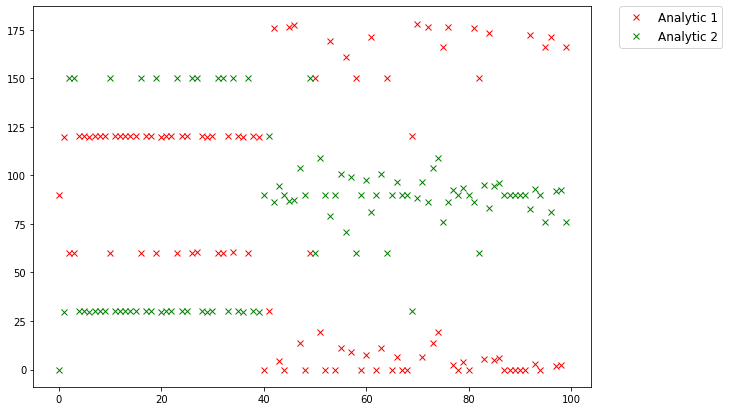

In [188]:
plt.figure(figsize=(10,7))
plt.plot(trace_angle[:100],'rx',label='Analytic 1')
plt.plot(trace_angle1[:100],'gx',label='Analytic 2')
#plt.plot(trace[:100],'bx',label='Txt')
plt.legend(bbox_to_anchor=(1.05, 1), prop={'size': 12}, loc='upper left', borderaxespad=0.)

In [156]:
(np.array(trace)==np.array(trace_angle)).all()

np.array(trace)-np.array(trace_angle)

array([-1.80000000e+02,  3.16859821e-01,  1.13733151e-01, ...,
       -1.80000000e+02, -1.80000000e+02,  0.00000000e+00])

In [181]:
trace_round=np.round(np.array(trace),1)
for i,boolean in enumerate(trace_round==trace_angle):
    if not boolean:
        print(trace_round[i])
        print(trace_angle[i])
        print()

0.0
180.0

150.3
150.0

30.1
30.0

30.1
30.0

149.9
150.0

149.9
150.0

150.3
150.0

149.9
150.0

149.9
150.0

149.9
150.0

30.1
30.0

149.9
150.0

149.9
150.0

149.9
150.0

149.9
150.0

149.9
150.0

30.1
30.0

149.9
150.0

149.9
150.0

30.1
30.0

150.3
150.0

149.9
150.0

149.9
150.0

30.1
30.0

149.9
150.0

149.9
150.0

30.1
30.0

29.7
30.0

149.9
150.0

150.3
150.0

149.9
150.0

30.1
30.0

30.1
30.0

149.9
150.0

29.7
30.0

149.9
150.0

150.3
150.0

30.1
30.0

149.9
150.0

150.3
150.0

30.1
30.0

119.9
120.0

149.9
150.0

29.7
30.0

159.0
158.9

30.1
30.0

0.0
180.0

19.2
19.1

16.2
16.1

0.0
180.0

171.0
171.1

29.7
30.0

0.0
180.0

141.1
141.0

0.0
180.0

38.9
39.0

0.0
180.0

111.1
111.0

0.0
180.0

0.0
180.0

132.4
132.3

19.9
19.8

149.9
150.0

0.0
180.0

0.0
180.0

149.9
150.0

172.9
172.8

68.9
69.0

0.0
180.0

141.1
141.0

141.1
141.0

0.0
180.0

29.9
30.0

0.0
180.0

30.1
30.0

0.0
180.0

38.9
39.0

60.1
60.0

160.8
160.9

111.1
111.0

158.5
158.4

0.0
180.0

149.9
150.0

2